In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, classification_report
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df=pd.read_csv("telco2.csv", sep=",") #load file
pd.set_option('max_columns',43)
df

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,OnlineServices,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,1,0,1,0,1,29.85,29.85,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,1,0,0,0,34,1,0,56.95,1889.50,0,3,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,2,1,0,0,0,2,1,1,53.85,108.15,1,3,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,3,1,0,0,0,45,0,0,42.30,1840.75,0,3,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,4,0,0,0,0,2,1,1,70.70,151.65,1,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,1,0,1,1,24,1,1,84.80,1990.50,0,7,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
7039,7039,0,0,1,1,72,1,1,103.20,7362.90,0,6,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
7040,7040,0,0,1,1,11,0,1,29.60,346.45,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
7041,7041,1,1,1,0,4,1,1,74.40,306.60,1,2,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1


In [3]:
df.drop(["Unnamed: 0",], axis =1, inplace = True)

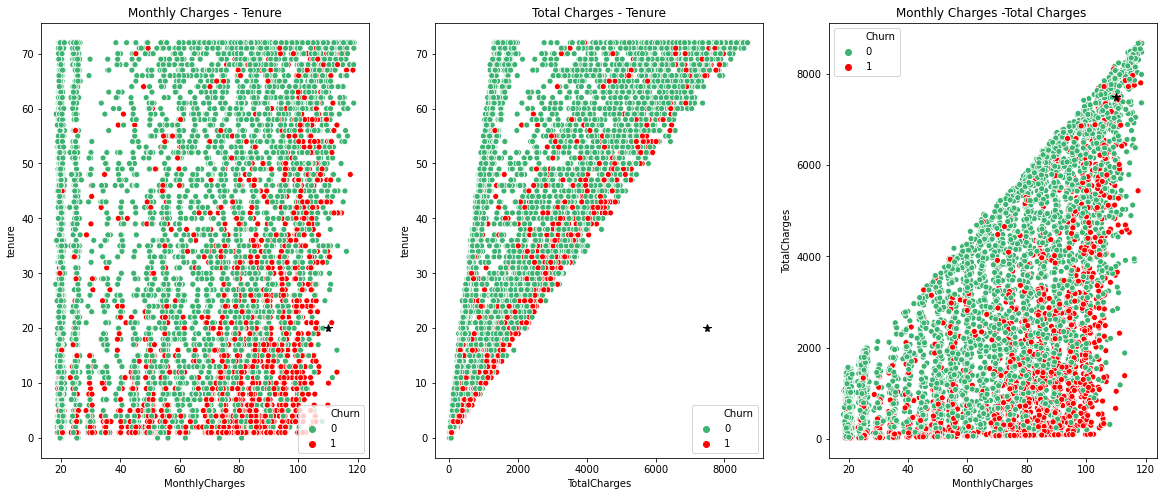

In [4]:
plt.figure(figsize=(20, 8))
plt.subplot(1,3,1)
sns.scatterplot(x="MonthlyCharges", y="tenure",palette=["mediumseagreen","red"], hue="Churn", data=df)
plt.title('Monthly Charges - Tenure')
plt.plot(110,20, color='black', marker='*', markersize=8)

plt.subplot(1,3,2)
sns.scatterplot(x="TotalCharges", y="tenure",palette=["mediumseagreen","red"], hue="Churn", data=df)
plt.title("Total Charges - Tenure")
plt.plot(7500,20, color='black', marker='*', markersize=8)

plt.subplot(1,3,3)
sns.scatterplot(x="MonthlyCharges", y="TotalCharges",palette=["mediumseagreen","red"], hue="Churn",data=df)
plt.title("Monthly Charges -Total Charges ")
plt.plot(110, 7500, color='black', marker='*', markersize=8)

plt.show()

In [5]:
y = df["Churn"]
X = df.drop(["Churn"], axis = 1)

Text(0.5, 1.0, 'All Data')

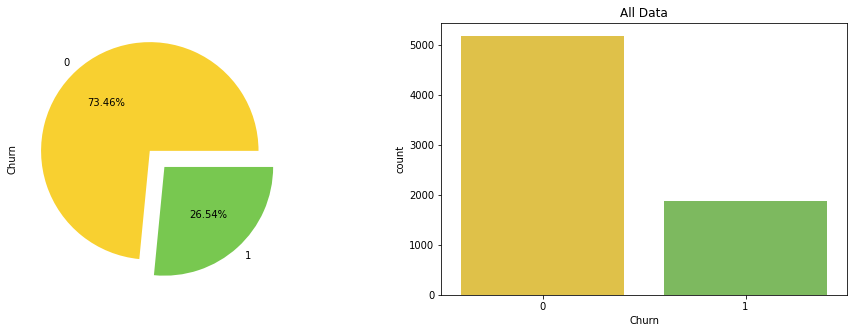

In [6]:
fig,ax=plt.subplots(ncols=2,figsize=(16,5)) #(Yes:1, No:0)
df["Churn"].value_counts().plot.pie(autopct="%.2f%%",colors=['#F8D030','#78C850'],explode = (0.1, 0.1),ax=ax[0])
plt.title("All Data")
sns.countplot(df["Churn"],ax=ax[1],palette=['#F8D030','#78C850'])
plt.title("All Data")

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

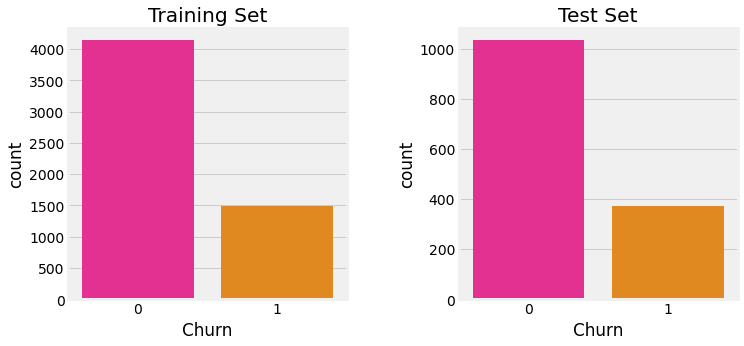

Proportion of '0' in all data     : %73 
Proportion of '0' in training set : %73 
Proportion of '0' in test set     : %73 


In [8]:
plt.figure(figsize=(12,5))
plt.style.use('fivethirtyeight')
plt.subplots_adjust(wspace=0.4)

plt.subplot(121)
sns.countplot(y_train,palette=['deeppink','darkorange'])
plt.title("Training Set")

plt.subplot(122)
sns.countplot(y_test,palette=['deeppink','darkorange'])
plt.title("Test Set")

plt.show()

print("Proportion of '0' in all data     : %{:.0f} ".format(len(y[y==0])/len(y)*100))
print("Proportion of '0' in training set : %{:.0f} ".format(len(y_train[y_train==0])/len(y_train)*100))
print("Proportion of '0' in test set     : %{:.0f} ".format(len(y_test[y_test==0])/len(y_test)*100))

In [9]:
from sklearn.preprocessing import StandardScaler
c = ["tenure","MonthlyCharges","TotalCharges","OnlineServices"]
for i in c:
    df[i] = StandardScaler().fit_transform(df[[i]])

df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,OnlineServices,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.277445,0,1,-1.160323,-0.992667,0,-1.145997,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.066327,1,0,-0.259629,-0.172198,0,-0.176011,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,-1.236724,1,1,-0.362660,-0.958122,1,-0.176011,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.514251,0,0,-0.746535,-0.193706,0,-0.176011,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,-1.236724,1,1,0.197365,-0.938930,1,-1.145997,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,-0.340876,1,1,0.665992,-0.127637,0,1.763962,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
7039,0,0,1,1,1.613701,1,1,1.277533,2.242641,0,1.278969,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
7040,0,0,1,1,-0.870241,0,1,-1.168632,-0.852985,0,-1.145997,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,-1.155283,1,1,0.320338,-0.870566,1,-0.661004,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1


In [10]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [11]:
from sklearn.metrics import confusion_matrix

x_pred = classifier.predict(X_train)
y_pred = classifier.predict(X_test)

c_matrix_train = confusion_matrix(y_train, x_pred)
c_matrix_test = confusion_matrix(y_test, y_pred)

print("Confusion matrix (Train data)", "-"*30, c_matrix_train, sep="\n")
print("Confusion matrix (Test data)", "-"*30, c_matrix_test, sep="\n")

Confusion matrix (Train data)
------------------------------
[[2643 1496]
 [ 226 1269]]
Confusion matrix (Test data)
------------------------------
[[656 379]
 [ 59 315]]


In [12]:
TN = c_matrix_test[0][0]
TP = c_matrix_test[1][1]
FP = c_matrix_test[0][1]
FN = c_matrix_test[1][0]

print("Doğru negatif sayısı   :", TN)
print("Doğru pozitif sayısı   :", TP)
print("Yanlış pozitif sayısı  :", FP)
print("Yanlış negatif sayısı  :", FN)

Doğru negatif sayısı   : 656
Doğru pozitif sayısı   : 315
Yanlış pozitif sayısı  : 379
Yanlış negatif sayısı  : 59


In [13]:
from sklearn.metrics import accuracy_score
print("Modelin eğitim verisindeki doğruluğu : ",classifier.score(X_train,y_train))
print("Modelden alınan doğruluk değeri : ",  classifier.score(X_test, y_test))
print("Hesaplanan doğruluk değeri      : ",  (TN + TP)/(FN + FP + TN + TP))
print("accuracy_score()        : ",  accuracy_score(y_test, y_pred))

Modelin eğitim verisindeki doğruluğu :  0.6943556975505857
Modelden alınan doğruluk değeri :  0.6891412349183819
Hesaplanan doğruluk değeri      :  0.6891412349183819
accuracy_score()        :  0.6891412349183819


In [14]:
test_array = np.array ([[1,0,0,0,20,0,0,110,7500,3,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0]])
classifier.predict(test_array)

array([0], dtype=int64)

In [15]:
from sklearn.metrics import f1_score,classification_report, precision_recall_fscore_support

print(classification_report(y_test,y_pred) )

print("f1_score()        : {:.2f}".format(f1_score(y_test, y_pred)))
print("recall_score()     : {:.2f}".format(recall_score(y_test, y_pred,average='macro')))
print("precision_score()  : {:.2f}".format(precision_score(y_test, y_pred,average='macro')))
print('\n')

metrikler =  precision_recall_fscore_support(y_test, y_pred)
print("Hassasiyet :" , metrikler[0]) 
print("Duyarlılık :" , metrikler[1]) 
print("F1 Skoru   :" , metrikler[2])

              precision    recall  f1-score   support

           0       0.92      0.63      0.75      1035
           1       0.45      0.84      0.59       374

    accuracy                           0.69      1409
   macro avg       0.69      0.74      0.67      1409
weighted avg       0.79      0.69      0.71      1409

f1_score()        : 0.59
recall_score()     : 0.74
precision_score()  : 0.69


Hassasiyet : [0.91748252 0.45389049]
Duyarlılık : [0.63381643 0.84224599]
F1 Skoru   : [0.74971429 0.58988764]


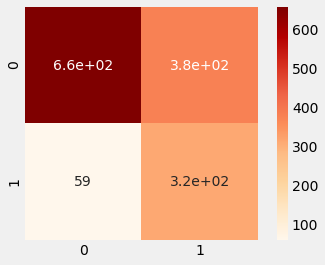

In [16]:
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, square=True, annot=True,  cmap="OrRd")

In [17]:
test_prediction_proba = classifier.predict_proba(X_test)[:,1]

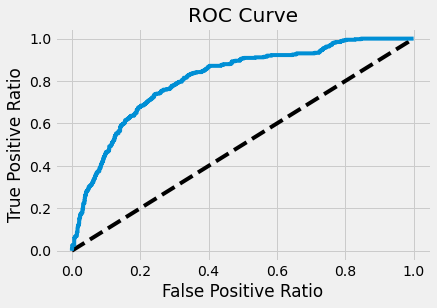

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds  = roc_curve(y_test, test_prediction_proba)

import matplotlib.pyplot as plt
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)

plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.title('ROC Curve')

plt.show()

In [19]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(classifier, 'n_bayes.pkl') 
classifier_score = classifier.score(X_test, y_test)
joblib.dump(classifier_score, 'n_bayesscore.pkl') 
# Load the model from the file 
#bayes_from_joblib = joblib.load('n_bayes.pkl')  
#bayes_from_score_joblib = joblib.load('n_bayesscore.pkl')  

['n_bayesscore.pkl']